In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import re
import spacy
import  nltk
print(nltk.__version__)
print(spacy.__version__)

3.4.5
3.4.3


In [3]:
pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nlp_id #indonesian library
from nlp_id.lemmatizer import Lemmatizer
from nlp_id.tokenizer import Tokenizer
from nlp_id.tokenizer import PhraseTokenizer
lemmatizer = Lemmatizer()
tokenizer = Tokenizer()
from nlp_id.stopword import StopWord
stopword = StopWord()

In [5]:
from spacy.lang.id.examples import sentences

In [6]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer as kerasTok
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 

#Importing the indonesian song dataset

In [8]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_id.pkl', mode='br') as inputfile:
  df_id = pickle.load(inputfile)

In [9]:
df_id.shape

(737, 5)

In [10]:
df_id = df_id.reset_index()
df_id = df_id.drop(['index'], axis = 1)

In [11]:
df_id.head()

,Artist,Song,Genre,Language,Lyrics
0,david bowie,amlapura (indonesian version),Rock,id,hey hey ada kapal layar menuju jawa dari jalan...
1,david bowie,everything is you,Rock,id,buh duh buh duh buh buh duh buh duh buh buh du...
2,drive,a song for brokenhearts,Metal,id,kesalahan membuat kita belajar menjadikan kita...
3,drive,bahagia untukmu,Metal,id,lihatlah dirimu terus berjalan dalam mimpi ind...
4,drive,a song for brokenhearts,Metal,id,kesalahan membuat kita belajar menjadikan kita...


In [12]:
categories3 = ['Rock', 'Pop', 'Jazz']

df_id_3 = df_id[df_id['Genre'].isin(categories3)]

In [13]:
df_id_3.head()

,Artist,Song,Genre,Language,Lyrics
0,david bowie,amlapura (indonesian version),Rock,id,hey hey ada kapal layar menuju jawa dari jalan...
1,david bowie,everything is you,Rock,id,buh duh buh duh buh buh duh buh duh buh buh du...
7,eddie vedder,hey fahkah,Rock,id,ajaja aahhgg fahkah fahkah
8,grand funk railroad,i come tumblin',Rock,id,i come tumblin down from the darkness i stretc...
10,matchbox 20,all your reasons,Rock,id,bah dah dah dah bah bah bah bah duh bah bah d...


In [14]:
labels = df_id_3['Genre'].unique()

Text(0.5, 1.0, 'Distribuzione Classi')

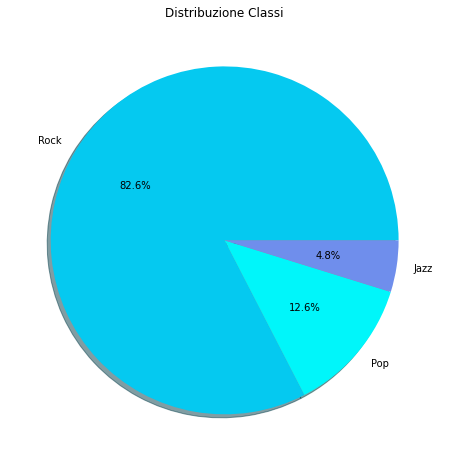

In [15]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#00f6fa', '#6f8eec', '#b2d5f0', '#075997']
plt.pie(df_id_3['Genre'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Distribuzione Classi')

#Splitting the dataset in training set and test set

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
id_train, id_test = sklearn.model_selection.train_test_split(df_id_3, test_size=0.20, train_size=0.80)

In [18]:
id_train.shape, id_test.shape

((551, 5), (138, 5))

In [19]:
df_id['Genre'].value_counts() 

Pop           569
Rock           87
Jazz           33
Indie          26
Metal          17
Folk            4
Electronic      1
Name: Genre, dtype: int64

#Tokenizing the lyrics with Kumparan's NLP tokenizer

In [20]:
x_train = id_train['Lyrics'].tolist()
y_train = id_train['Genre'].tolist()

In [21]:
x_test = id_test['Lyrics'].tolist()
y_test = id_test['Genre'].tolist()

In [22]:
len(x_train), len(y_train), len(x_test), len(y_test)

(551, 551, 138, 138)

In [23]:
set(y_train)

{'Jazz', 'Pop', 'Rock'}

In [24]:
sample_idx = 79
x_train[sample_idx]

'yeogi buteora modu moyeora we gon party like lilililalala mameul yeoreora meoril biwora bureul jipyeora lilililalala jeongdabeun mutji malgo geudaero badadeullyeo neukkimdaero ga alright haneureul majuhago du soneul da wiro jeo wiro nalttwigo shipeo oh nanananana nanananana wow fantastic baby dance i wanna dan dan dan dan dance fantastic baby dance i wanna dan dan dan dan dance wow fantastic baby i nanjangpane hey kkeutpan wang charye hey ttangeul heundeulgo buneuron bulchungbunhan race wait bunwigineun gwayeol catch me on fire huh jinjjaga natanatda nananana hanabuteo yeolkkaji modeun ge da han suwi morae beolpan wireul michin deushi ttwieobwado geotteunhan uri haneureun chungbunhi neomuna pureunikka amugeotdo mutji mallan mariya neukkiran mariya naega nugunji ne shimjangsorie matge ttwigi shijakhae magi kkeutnal ttaekkaji ye i can t baby don t stop this oneureun tarakhae michyeo barakhae ganeungeoya wow fantastic baby dance i wanna dan dan dan dan dance fantastic baby dance i wanna 

In [25]:
y_train[sample_idx]

'Pop'

In [26]:
import string
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopword.get_stopword() #from nlp-id module
punctuations = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
def kumparan_nlp_tokenizer (text):
   
    doc = tokenizer.tokenize(text) #nlp-id tokenizer

    #lemmatizing tokens and lowering case
    lemmas = [lemmatizer.lemmatize(token) for token in doc]

    #removing stopwords and punctuations
    lemmas_stop = [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

#Token vectorization with CountVectorizer and kumparan's nlp tokenizer function above

In [28]:
vectors = CountVectorizer (analyzer = kumparan_nlp_tokenizer, min_df = 5)

In [29]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [30]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id3_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id3_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [31]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id3_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/id3_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

In [32]:
len(vectors.vocabulary_)

3962

In [33]:
vectors.vocabulary_

{'geunyeoga': 2380,
 'tteonagayo': 3777,
 'naneun': 3204,
 'amugeosdo': 1722,
 'hal': 2499,
 'su': 3646,
 'eopseoyo': 2205,
 'sarang': 3496,
 'babocheoreom': 1797,
 'meonghani': 3061,
 'seo': 3535,
 'meoreojineun': 3063,
 'geu': 2358,
 'baraboda': 1821,
 'jageun': 2716,
 'jeomi': 2758,
 'doeeo': 2108,
 'sarajinda': 3485,
 'sigani': 3578,
 'jinamyeon': 2790,
 'tto': 3781,
 'mudyeojilkka': 3146,
 'yet': 3938,
 'saenggagi': 3461,
 'na': 3165,
 'ni': 3266,
 'if': 2623,
 'you': 3946,
 'ajik': 1704,
 'neomu': 3239,
 'uri': 3813,
 'dasi': 2050,
 'doragal': 2128,
 'suneun': 3660,
 'eopseulkka': 2207,
 'neodo': 3232,
 'nawa': 3220,
 'gati': 2321,
 'himdeuldamyeon': 2570,
 'jogeum': 2802,
 'swipge': 3673,
 'gal': 2290,
 'isseul': 2683,
 'ttae': 3759,
 'jalhal': 2725,
 'geol': 2333,
 'geuraesseo': 2386,
 'geudaeneun': 2364,
 'eotteongayo': 2220,
 'jeongmal': 2765,
 'amureohji': 1725,
 'anheun': 1745,
 'geongayo': 2337,
 'ibyeori': 2619,
 'jinabwayo': 2789,
 'geudael': 2361,
 'ijeoya': 2636,
 'haj

#SVM Classification - 3 classes

---






In [34]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 2)), #tokenization
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)


Classification report:
              precision    recall  f1-score   support

        Jazz       0.00      0.00      0.00         2
         Pop       0.91      0.99      0.95       118
        Rock       0.88      0.39      0.54        18

    accuracy                           0.90       138
   macro avg       0.60      0.46      0.50       138
weighted avg       0.90      0.90      0.88       138

Confusion matrix:
[[  0   2   0]
 [  0 117   1]
 [  2   9   7]]


In [35]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [50, 100, 250,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
SVM_opt_search.best_params_

{'learner__C': 100, 'sel__k': 'all'}

In [37]:
SVM_opt_search.best_estimator_

Pipeline(memory=None,
         steps=[('sel',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7fbcee9fe170>)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('learner',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [38]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

        Jazz       0.50      1.00      0.67         2
         Pop       0.93      0.97      0.95       118
        Rock       0.64      0.39      0.48        18

    accuracy                           0.89       138
   macro avg       0.69      0.78      0.70       138
weighted avg       0.88      0.89      0.88       138

Confusion matrix:
[[  2   0   0]
 [  0 114   4]
 [  2   9   7]]


# Random Forest Classification - 3 classes

---




In [39]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

        Jazz       0.00      0.00      0.00         2
         Pop       0.90      0.97      0.93       118
        Rock       0.70      0.39      0.50        18

    accuracy                           0.88       138
   macro avg       0.53      0.45      0.48       138
weighted avg       0.86      0.88      0.86       138

Confusion matrix:
[[  0   2   0]
 [  0 115   3]
 [  0  11   7]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#LSTM Classification - 3 classes

---



---



In [40]:
id_train['Genre_number'] = id_train['Genre']

numbers = []

for i in id_train['Genre']:
  if i == 'Rock':
    numbers.append(0)

  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Jazz':
    numbers.append(2)
  
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
id_train['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
id_test['Genre_number'] = id_test['Genre']

numbers_test = []

for i in id_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)

  if i == 'Pop':
    numbers_test.append(1)
  
  elif i == 'Jazz':
    numbers_test.append(2)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
id_test['Genre_number'] = numbers_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
y_train = id_train['Genre_number'] #substituting the columns in the variables
y_test = id_test['Genre_number']

In [45]:
y_train = to_categorical(y_train,3)  #converting to one-hot vectors
y_test = to_categorical(y_test, 3)

In [46]:
y_train.shape, y_test.shape

((551, 3), (138, 3))

In [47]:
#max number of words to be used
max_features = 20000
#max number of words in each lyrics
maxlen = 200
#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = kerasTok(num_words=max_features, lower=True) #keras Tokenizer
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [48]:
X_train_final.shape, y_train.shape

((551, 200), (551, 3))

In [49]:
X_test_final.shape, y_test.shape

((138, 200), (138, 3))

In [50]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(10, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 10)                5560      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0

In [51]:
lstm3 = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm3

Epoch 1/10
7/7 [==============================] - 6s 332ms/step - loss: 1.0788 - accuracy: 0.6000 - val_loss: 1.0109 - val_accuracy: 0.8649
Epoch 2/10
7/7 [==============================] - 2s 257ms/step - loss: 0.9703 - accuracy: 0.8068 - val_loss: 0.8724 - val_accuracy: 0.8649
Epoch 3/10
7/7 [==============================] - 2s 262ms/step - loss: 0.8584 - accuracy: 0.8068 - val_loss: 0.7540 - val_accuracy: 0.8649
Epoch 4/10
7/7 [==============================] - 2s 266ms/step - loss: 0.7701 - accuracy: 0.8068 - val_loss: 0.6682 - val_accuracy: 0.8649
Epoch 5/10
7/7 [==============================] - 2s 275ms/step - loss: 0.7160 - accuracy: 0.8068 - val_loss: 0.6073 - val_accuracy: 0.8649
Epoch 6/10
7/7 [==============================] - 2s 259ms/step - loss: 0.6838 - accuracy: 0.8068 - val_loss: 0.5655 - val_accuracy: 0.8649
Epoch 7/10
7/7 [==============================] - 2s 260ms/step - loss: 0.6667 - accuracy: 0.8068 - val_loss: 0.5422 - val_accuracy: 0.8649
Epoch 8/10
7/7 [====

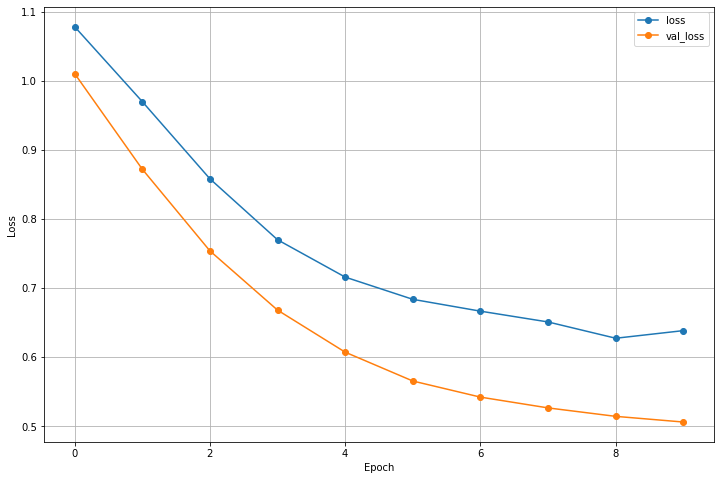

In [52]:
plt.plot(lstm3.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [53]:
lstm3_pred = np.round(model.predict(X_test_final))

5/5 [==============================] - 0s 22ms/step


In [54]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_pred))
print('F1-score %s' % f1_score(y_test, lstm3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_pred, zero_division=1))

Accuracy 0.855072463768116
F1-score [0.       0.921875 0.      ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.86      1.00      0.92       118
           2       1.00      0.00      0.00         2

   micro avg       0.86      0.86      0.86       138
   macro avg       0.29      0.33      0.31       138
weighted avg       0.73      0.86      0.79       138
 samples avg       0.86      0.86      0.86       138



#CNN Classification - 3 Classes

In [55]:
#max number of words to be used
max_features = 20000
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = kerasTok(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [56]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                      

In [57]:
cnn3= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
8/8 [==============================] - 1s 92ms/step - loss: 0.9870 - accuracy: 0.6222 - val_loss: 0.8347 - val_accuracy: 0.8393
Epoch 2/20
8/8 [==============================] - 1s 64ms/step - loss: 0.7758 - accuracy: 0.8141 - val_loss: 0.6643 - val_accuracy: 0.8393
Epoch 3/20
8/8 [==============================] - 1s 67ms/step - loss: 0.7286 - accuracy: 0.8162 - val_loss: 0.5921 - val_accuracy: 0.8393
Epoch 4/20
8/8 [==============================] - 1s 67ms/step - loss: 0.7049 - accuracy: 0.8162 - val_loss: 0.5783 - val_accuracy: 0.8393
Epoch 5/20
8/8 [==============================] - 0s 62ms/step - loss: 0.6974 - accuracy: 0.8162 - val_loss: 0.5724 - val_accuracy: 0.8393
Epoch 6/20
8/8 [==============================] - 1s 66ms/step - loss: 0.6415 - accuracy: 0.8162 - val_loss: 0.5658 - val_accuracy: 0.8393
Epoch 7/20
8/8 [==============================] - 1s 64ms/step - loss: 0.6733 - accuracy: 0.8162 - val_loss: 0.5625 - val_accuracy: 0.8393
Epoch 8/20
8/8 [===========

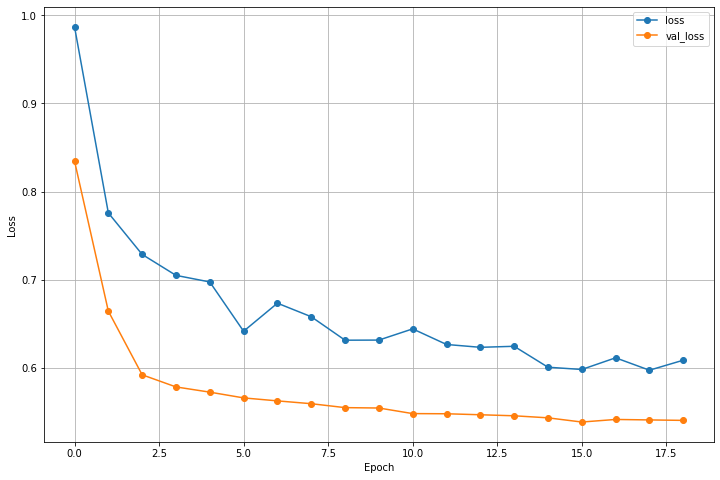

In [58]:
plt.plot(cnn3.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [59]:
cnn3_pred = np.round(model.predict(X_test_final))

5/5 [==============================] - 0s 7ms/step


In [60]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_pred))
print('F1-score %s' % f1_score(y_test, cnn3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_pred, zero_division=1))

Accuracy 0.855072463768116
F1-score [0.       0.921875 0.      ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.86      1.00      0.92       118
           2       1.00      0.00      0.00         2

   micro avg       0.86      0.86      0.86       138
   macro avg       0.29      0.33      0.31       138
weighted avg       0.73      0.86      0.79       138
 samples avg       0.86      0.86      0.86       138



#Classification with Word2Vec

In [61]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [62]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [63]:
import gensim
from gensim.models import Word2Vec

In [64]:
df_id_3['Genre_number'] = df_id_3['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_id_3['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
   
  elif i == 'Jazz':
    numbers.append(2)
    
 
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_id_3['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences
sentence_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
sentences =[]
sum=0
for lyrics in df_id_3['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

689
689


In [67]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['hey', 'hey', 'ada', 'kapal', 'layar', 'menuju', 'jawa', 'dari', 'jalan', 'ke', 'jawa', 'jaga', 'jaga', 'jika', 'ada', 'orang', 'bugis', 'hey', 'hey', 'ini', 'mimpi', 'kukan', 'bakarmu', 'jika', 'kau', 'harus', 'pergi', 'hey', 'hey', 'kubakan', 'maka', 'diriku', 'jika', 'kau', 'baring', 'di', 'balai', 'bambu', 'kumimpi', 'tentang', 'amlapura', 'tak', 'pernah', 'kulihat', 'permata', 'seindah', 'ini', 'kumimpi', 'tentang', 'amlapura', 'lautan', 'atau', 'mimpi', 'tentang', 'patung', 'putri', 'hey', 'hey', 'patung', 'raja', 'dikalungi', 'mawar', 'emas', 'hey', 'hey', 'kanak', 'kanak', 'tewas', 'di', 'tempat', 'oleh', 'bedil', 'belanda', 'dari', 'kapal', 'letaknya', 'kumimpi', 'tentang', 'amlapura', 'tak', 'pernah', 'kulihat', 'permata', 'seindah', 'ini', 'kumimpi', 'tentang', 'amlapura', 'lautan', 'atau', 'mimpi', 'tentang', 'patung', 'putri', 'kumimpi', 'tentang', 'amlapura', 'tentang', 'patung', 'putri', 'hey', 'hey', 'ada', 'kapal', 'layar', 'kumimpi', 'tentang', 'amlapura', 'atas', 'd

In [68]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [69]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(1734908, 1833110)

In [70]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  27105


In [71]:
w2v_model.wv.most_similar('dalam')

[('langit', 0.9965002536773682),
 ('suatu', 0.9962364435195923),
 ('hati', 0.995893120765686),
 ('dua', 0.9946617484092712),
 ('ada', 0.9946359992027283),
 ('cinta', 0.9945511221885681),
 ('diriku', 0.9941960573196411),
 ('mengapa', 0.9940962791442871),
 ('oleh', 0.9938173890113831),
 ('angin', 0.9938133955001831)]

In [72]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

27105

In [73]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_id_3['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

1378


In [74]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=kerasTok()
tok.fit_on_texts(df_id_3['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_id_3['Lyrics'])

In [75]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(689, 1378)

In [76]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [77]:
Y= to_categorical(df_id_3['Genre_number'], 3) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [78]:
y_train.shape, y_test.shape

((551, 3), (138, 3))

#LSTM Classification with Word2Vec

---



---



In [79]:
from keras.initializers import Constant


In [80]:
epochs=10
batch_size=64

In [81]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1378, 300)         8129100   
                                                                 
 lstm_1 (LSTM)               (None, 20)                25680     
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                672       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 8,155,551
Trainable params: 26,451
Non-t

In [82]:
lstm_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm_w2v

Epoch 1/10
7/7 [==============================] - 42s 5s/step - loss: 1.0590 - accuracy: 0.7432 - val_loss: 0.9704 - val_accuracy: 0.8198
Epoch 2/10
7/7 [==============================] - 22s 3s/step - loss: 0.8928 - accuracy: 0.8341 - val_loss: 0.8016 - val_accuracy: 0.8198
Epoch 3/10
7/7 [==============================] - 22s 3s/step - loss: 0.7380 - accuracy: 0.8341 - val_loss: 0.6851 - val_accuracy: 0.8198
Epoch 4/10
7/7 [==============================] - 22s 3s/step - loss: 0.6466 - accuracy: 0.8318 - val_loss: 0.6255 - val_accuracy: 0.8198
Epoch 5/10
7/7 [==============================] - 24s 4s/step - loss: 0.6030 - accuracy: 0.8341 - val_loss: 0.6013 - val_accuracy: 0.8198
Epoch 6/10
7/7 [==============================] - 22s 3s/step - loss: 0.5828 - accuracy: 0.8341 - val_loss: 0.5925 - val_accuracy: 0.8198
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 0.5689 - accuracy: 0.8341 - val_loss: 0.5896 - val_accuracy: 0.8198
Epoch 8/10
7/7 [==================

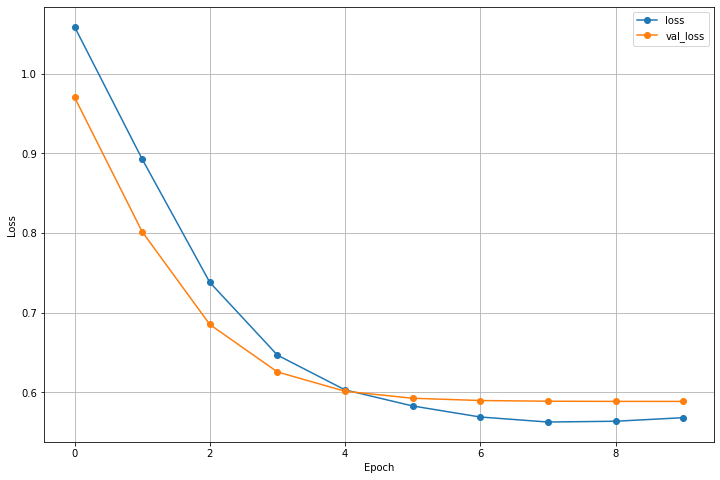

In [83]:
plt.plot(lstm_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM classification with w2v

In [84]:
lstmW2V_pred = np.round(model.predict(x_test))

5/5 [==============================] - 2s 241ms/step


In [85]:
print('Accuracy %s' % accuracy_score(y_test, lstmW2V_pred))
print('F1-score %s' % f1_score(y_test, lstmW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstmW2V_pred))

Accuracy 0.8043478260869565
F1-score [0.         0.89156627 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.80      1.00      0.89       111
           2       0.00      0.00      0.00         9

   micro avg       0.80      0.80      0.80       138
   macro avg       0.27      0.33      0.30       138
weighted avg       0.65      0.80      0.72       138
 samples avg       0.80      0.80      0.80       138



#CNN Classification with Word2Vec

In [86]:
filters=10
kernel_size=3
epochs=20

In [87]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1378, 300)         8129100   
                                                                 
 conv1d_1 (Conv1D)           (None, 1376, 10)          9010      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                352       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                      

In [88]:
cnn_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
cnn_w2v

Epoch 1/20
7/7 [==============================] - 4s 513ms/step - loss: 0.7711 - accuracy: 0.7023 - val_loss: 0.5261 - val_accuracy: 0.8198
Epoch 2/20
7/7 [==============================] - 3s 476ms/step - loss: 0.5437 - accuracy: 0.8182 - val_loss: 0.4778 - val_accuracy: 0.8198
Epoch 3/20
7/7 [==============================] - 3s 474ms/step - loss: 0.5104 - accuracy: 0.8250 - val_loss: 0.4765 - val_accuracy: 0.8198
Epoch 4/20
7/7 [==============================] - 3s 477ms/step - loss: 0.4626 - accuracy: 0.8273 - val_loss: 0.4714 - val_accuracy: 0.8198
Epoch 5/20
7/7 [==============================] - 3s 472ms/step - loss: 0.4383 - accuracy: 0.8250 - val_loss: 0.4688 - val_accuracy: 0.8198
Epoch 6/20
7/7 [==============================] - 3s 471ms/step - loss: 0.4525 - accuracy: 0.8273 - val_loss: 0.4533 - val_accuracy: 0.8198
Epoch 7/20
7/7 [==============================] - 3s 471ms/step - loss: 0.4213 - accuracy: 0.8364 - val_loss: 0.4578 - val_accuracy: 0.8198
Epoch 8/20
7/7 [====

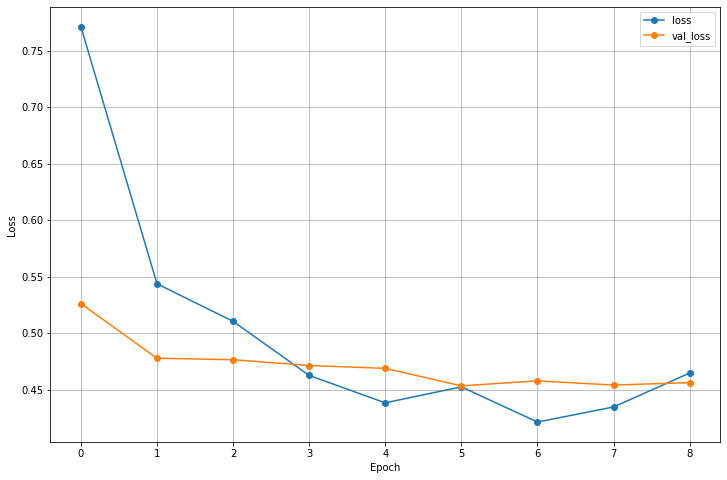

In [89]:
plt.plot(cnn_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN classification with w2v

In [90]:
cnnW2V_pred = np.round(model.predict(x_test))

5/5 [==============================] - 0s 57ms/step


In [91]:
print('Accuracy %s' % accuracy_score(y_test, cnnW2V_pred))
print('F1-score %s' % f1_score(y_test, cnnW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnnW2V_pred, zero_division=1))

Accuracy 0.7536231884057971
F1-score [0.        0.9122807 0.       ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.89      0.94      0.91       111
           2       1.00      0.00      0.00         9

   micro avg       0.89      0.75      0.82       138
   macro avg       0.30      0.31      0.30       138
weighted avg       0.71      0.75      0.73       138
 samples avg       0.75      0.75      0.75       138



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
